In [1]:
# 1. Get the data ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

heart_disease = pd.read_csv('./data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create X (features matrix)
x = heart_disease.drop('target', axis=1)

# Create y (labels)
y = heart_disease['target']

In [3]:
# Choose the right models and hyperparameters
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

# We'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [5]:
clf.fit(x_train, y_train)

RandomForestClassifier()

In [6]:
# Make a prediction
y_preds = clf.predict(x_test)
y_preds

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1])

In [7]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2
230,47,1,2,108,243,0,1,152,0,0.0,2,0,2
254,59,1,3,160,273,0,0,125,0,0.0,2,0,2
135,49,0,0,130,269,0,1,163,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,45,1,0,115,260,0,0,185,0,0.0,2,0,2
271,61,1,3,134,234,0,1,145,0,2.6,1,2,2
200,44,1,0,110,197,0,0,177,0,0.0,2,1,2
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2


In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [10]:
clf.score(x_test, y_test)

0.8032786885245902

In [11]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        33
           1       0.74      0.89      0.81        28

    accuracy                           0.80        61
   macro avg       0.81      0.81      0.80        61
weighted avg       0.82      0.80      0.80        61



In [12]:
confusion_matrix(y_test, y_preds)

array([[24,  9],
       [ 3, 25]])

In [13]:
# 5. Improve a model
# Try different amount of n_estimators

for i in range(10, 100, 10):
    print(f"Trying model with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%")
    print("")

Trying model with 10 estimators...
Model accuracy on test set: 73.77%

Trying model with 20 estimators...
Model accuracy on test set: 77.05%

Trying model with 30 estimators...
Model accuracy on test set: 80.33%

Trying model with 40 estimators...
Model accuracy on test set: 83.61%

Trying model with 50 estimators...
Model accuracy on test set: 78.69%

Trying model with 60 estimators...
Model accuracy on test set: 78.69%

Trying model with 70 estimators...
Model accuracy on test set: 75.41%

Trying model with 80 estimators...
Model accuracy on test set: 81.97%

Trying model with 90 estimators...
Model accuracy on test set: 78.69%



In [14]:
# Save a model and load it
pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [15]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
loaded_model.score(x_test, y_test)

0.7868852459016393

## 1. Getting our data ready to be used with machine learning

Three main things we have to do:<br />
    1. Split the data into features and labels (usually `x` and `y`)<br />
    2. Filling (also called imputing) or disregarding missing values<br />
    3. Converting non-numerical values to numerical values (also called feature encoding)<br />

In [16]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
x = heart_disease.drop("target", axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
y = heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### Make sure its all numerical

In [21]:
car_sales = pd.read_csv("./data/car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [22]:
# Split the data in x and y
x = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

In [23]:
# Split into train and test set
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size=0.2)

In [24]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor

# Fields which can be used to divide into categories
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

# Transformer object to transform the data
# Args: name, transformer, categorical_features
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

# Transform the data
transformed_x = transformer.fit_transform(x)
transformed_x[:10]

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 8.47140e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.54365e+05],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 1.81577e+05],
       [0.00000e+00, 1.00000e+

In [25]:
np.random.seed(42)

# Split the numerical data into train and test set
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

# Fit the train set on model
model.fit(x_train, y_train)

RandomForestRegressor()

In [26]:
model.score(x_test, y_test)

0.3235867221569877

### What if there were missing values
1. Fill them with some value (also called imputation)
2. Remove the samples with missing values altogether

In [27]:
# Import car sales missing data
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [28]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [29]:
# Option 1: Fill missing data with Pandas
car_sales_missing["Make"].fillna("missing", inplace=True)
car_sales_missing["Colour"].fillna("missing", inplace=True)
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace=True)
car_sales_missing["Doors"].fillna(4, inplace=True)

In [30]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [31]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [32]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [33]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [34]:
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [35]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Fields which can be used to divide into categories
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

# Transformer object to transform the data
# Args: name, transformer, categorical_features
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

# Transform the data
transformed_x = transformer.fit_transform(car_sales_missing)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]], shape=(950, 16))

In [36]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [37]:
car_sales_missing = pd.read_csv("./data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [38]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
car_sales_missing.dropna(subset=["Price"], inplace=True)

In [40]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [41]:
# Split into x and y
x = car_sales_missing.drop("Price", axis=1)
y = car_sales_missing["Price"]

In [42]:
# Fill missing values using scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' and numerical values with mean
cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Crete an imputer (Something that fills missing data)
imputer = ColumnTransformer([("cat_imputer", cat_imputer, cat_features), ("door_imputer", door_imputer, door_features), ("num_imputer", num_imputer, num_features)])

# Transform the data
filled_x = imputer.fit_transform(x)

In [43]:
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], shape=(950, 4), dtype=object)

In [44]:
car_sales_filled = pd.DataFrame(filled_x, columns=["Make", "Colour", "Doors", "Odometer (KM)"])

In [45]:
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [46]:
# Fields which can be used to divide into categories
categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

# Transformer object to transform the data
# Args: name, transformer, categorical_features
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder="passthrough")

# Transform the data
transformed_x = transformer.fit_transform(car_sales_filled)
transformed_x

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3800 stored elements and shape (950, 15)>

In [47]:
# Now we've got our data as numbers and filled (no missing values)
# Fit the data into model
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.21990196728583944

In [48]:
for i in range(1, 100, 10):
    model = RandomForestRegressor(n_estimators=i)
    model.fit(x_train, y_train)
    score = model.score(x_test, y_test)
    print(f"Model score with {i} estimators: {score}%")

Model score with 1 estimators: -0.41252973466015685%
Model score with 11 estimators: 0.19709526972129343%
Model score with 21 estimators: 0.1995195677976812%
Model score with 31 estimators: 0.21186290708862887%
Model score with 41 estimators: 0.20350480774668755%
Model score with 51 estimators: 0.2255393676881513%
Model score with 61 estimators: 0.18457713232074613%
Model score with 71 estimators: 0.21791051459393873%
Model score with 81 estimators: 0.22697316242711263%
Model score with 91 estimators: 0.22280520573411677%


## 2. Choosing the right estimator/algorithm for your problem

Some things to note:
* Sklearn refers to machine learning models, algorithms as estimators
* Classification problem - predicting a category (eg: Heart disease or not)
    * Sometimes you'll see clf (short for classifier) used as a classification estimator
* Regression problem - predicting a number (selling price of a car)

Which Model to choose? Refer here: https://scikit-learn.org/stable/machine_learning_map.html

### 2.1 Picking a machine learning model for a Regression problem

Let's use the california housing dataset - https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html

In [49]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]], shape=(20640, 8)),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894], shape=(20640,)),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': 

In [50]:
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [51]:
housing_df["target"] = housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [52]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [53]:
# Import algorithm/estimator
from sklearn.linear_model import Ridge

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"] # Median house price in 100,000s

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = Ridge()
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
model.score(x_test, y_test)


0.5758549611440126

What if `Ridge` didn't work or the score didn't fit in our needs?

Well, we could always try a different model...

How about we try an ensemble model (an ensemble is combination of smaller models to try and make better predictions than just a single model)

In [54]:
# Import algorithm/estimator
from sklearn.ensemble import RandomForestRegressor

# Setup random seed
np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"] # Median house price in 100,000s

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate and fit the model (on the training set)
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
model.score(x_test, y_test)


0.806652667101436

### 2.2 Choosing an estimator for a classification problem
Let's go to the map... https://scikit-learn.org/stable/machine_learning_map.html

In [55]:
heart_disease = pd.read_csv("./data/heart-disease.csv");
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [56]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate LinearSVC

clf = LinearSVC()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8688524590163934

Tidbit:
    1. If you have structured data, use ensemble methods
    2. If you have unstructured data, use deep learning or transfer learning

In [57]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# Setup random seed
np.random.seed(42)

# Make the data
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_train, y_train)
clf.score(x_test, y_test)

0.8524590163934426

## 3. Fit the model/algorithm on our data to use it to make predictions

### 3.1. Fitting the model to the data

Different names for:
* `x` = features, feature variables, data
* `y` = labels, targets, target variables

In [58]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [59]:
x.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2


### 3.2. Make predictions using a machine learning model

In [60]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [61]:
y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

np.float64(0.8524590163934426)

In [62]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_preds)

0.8524590163934426

In [63]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data
x = housing_df.drop("target", axis=1)
y = housing_df["target"]

# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor()
model.fit(x_train, y_train)

y_preds = model.predict(x_test)

In [64]:
y_preds[:10]

array([0.4939   , 0.75494  , 4.9285964, 2.54024  , 2.33176  , 1.6602201,
       2.3431   , 1.66311  , 2.47489  , 4.8344779])

In [65]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_preds)

0.32656738464147306

## 4. Evaluating a machine learning model

Three ways to evalute scikit learn models/estimators
1. Estimator's build it `score()` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1. Evaluating a model with the `score` method

In [66]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train, y_train)

clf.score(x_test, y_test)

0.8524590163934426

In [67]:
# The default score evaluation metric is r_squared for regression  algorithms
# Highest = 1.0 & Lowest = 0.0 
clf.score(x_test, y_test)

0.8524590163934426

### 4.2. Evaluating a model using the `scoring` parameter

In [68]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(x_train, y_train)

cross_val_score(clf, x, y, cv=5)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [69]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(x_test, y_test)

# Take the mean of 5-fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, x, y, cv=5))

print(clf_single_score, clf_cross_val_score)

0.8524590163934426 0.8248087431693989


### 4.2.1. Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

Accuracy

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

cross_val_score = cross_val_score(clf, x, y, cv=5)
cross_val_score

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [71]:
np.mean(cross_val_score)

np.float64(0.8248087431693989)

In [72]:
print(f"Heart disease classification accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart disease classification accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area Under Curve (AUC)
* ROC Curve

ROC curves are a comparison of model's true positive rate (TPR) and a model's false positive rate (FPR)

* True Positive = Model predicts 1 when truth is 1
* False Positive = Model predicts 1 when truth is 0
* True Negative = Model predicts 0  when truth is 0
* False Negative = Model predicts 0  when truth is 1

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [74]:
from sklearn.metrics import roc_curve

np.random.seed(42)

clf.fit(x_train, y_train)

y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[0.59, 0.41],
        [0.19, 0.81],
        [0.52, 0.48],
        [0.73, 0.27],
        [0.49, 0.51],
        [0.12, 0.88],
        [0.32, 0.68],
        [0.97, 0.03],
        [0.17, 0.83],
        [0.46, 0.54]]),
 61)

In [75]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.41, 0.81, 0.48, 0.27, 0.51, 0.88, 0.68, 0.03, 0.83, 0.54])

In [76]:
# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
fpr

array([0.        , 0.        , 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.17241379,
       0.17241379, 0.20689655, 0.24137931, 0.24137931, 0.31034483,
       0.34482759, 0.34482759, 0.37931034, 0.37931034, 0.48275862,
       0.48275862, 0.55172414, 0.55172414, 0.5862069 , 0.65517241,
       0.75862069, 0.86206897, 0.89655172, 0.96551724, 1.        ])

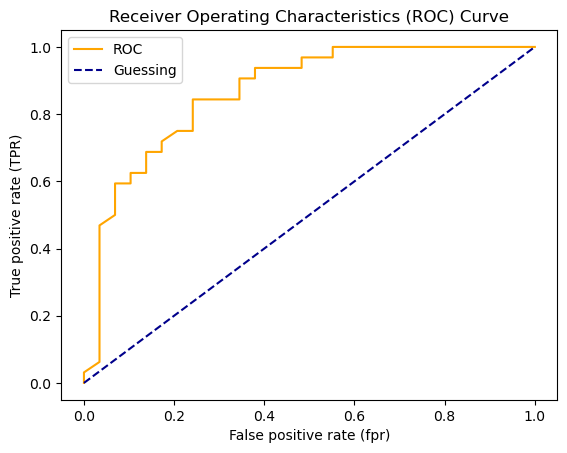

In [77]:
# Create a function for plotting roc curves
import matplotlib.pyplot as plt

def plot_roc_carve(fpr, tpr):
    """
    Plots a roc curve given the false positive rate (fpr) and true positive rate (tpr) of a model.
    """
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label="ROC")

    plt.plot([0, 1], [0, 1], color="darkblue", linestyle="--", label="Guessing")

    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (TPR)")
    plt.title("Receiver Operating Characteristics (ROC) Curve")

    plt.legend()
    plt.show()

plot_roc_carve(fpr, tpr)

In [78]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

np.float64(0.8658405172413793)

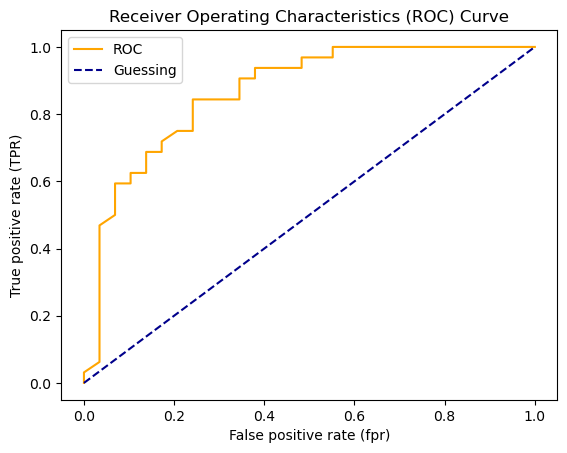

In [79]:
# Perfect ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)
plot_roc_carve(fpr, tpr)

**A confusion matrix is a quick way to compare the lebels a model predicts and the actual lebels it was supposed to predict**

In essence, giving you an idea of where the model is getting confused

In [80]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[22,  7],
       [ 7, 25]])

In [81]:
pd.crosstab(y_test, y_preds, rownames=["Actual Label"], colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,22,7
1,7,25


In [82]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn

Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



<Axes: >

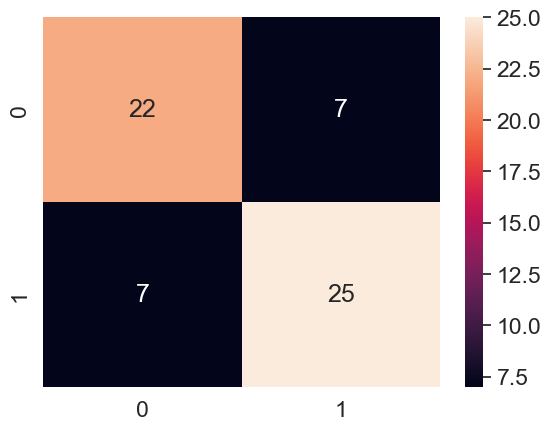

In [83]:
# Make our confusion matrix more visual with seaborn's heatmap()
import seaborn as sns

sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn
sns.heatmap(conf_mat, annot=True)

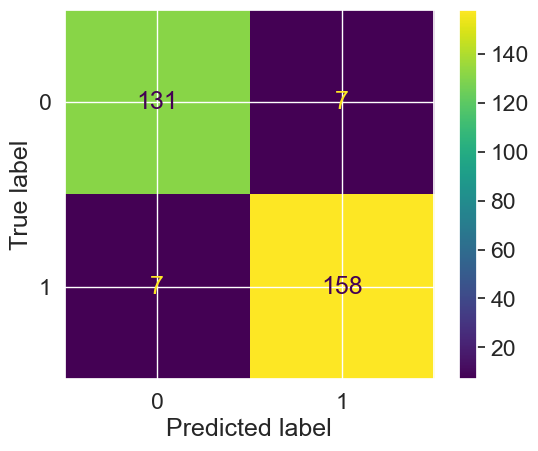

In [84]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=x, y=y)

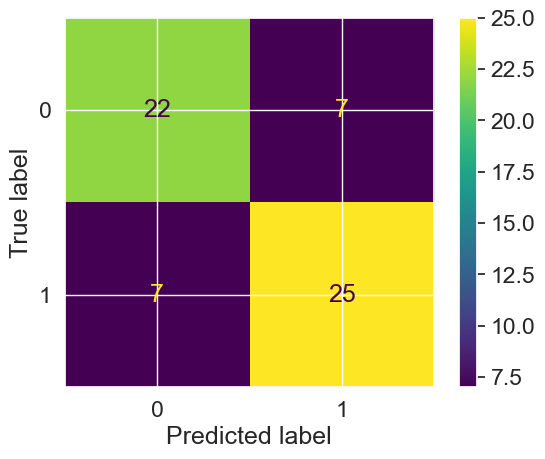

In [85]:
ConfusionMatrixDisplay.from_predictions(y_test, y_preds)

**Classification Report**

In [86]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        29
           1       0.78      0.78      0.78        32

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



In [87]:
# Where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # Model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

Model evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The one's we're going to cover are:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)

In [89]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = housing_df.drop("target", axis=1)
y = housing_df["target"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [90]:
model.score(x_test, y_test)

0.806652667101436

In [91]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [92]:
y_test

20046    0.47700
3024     0.45800
15663    5.00001
20484    2.18600
9814     2.78000
          ...   
15362    2.63300
16623    2.66800
18086    5.00001
2144     0.72300
3665     1.51500
Name: target, Length: 4128, dtype: float64

In [93]:
y_test.mean()

np.float64(2.0550030959302323)

In [94]:
from sklearn.metrics import r2_score

# Fill an array with y_test_mean
y_test_mean = np.full(len(y_test), y_test.mean())

In [95]:
y_test_mean

array([2.0550031, 2.0550031, 2.0550031, ..., 2.0550031, 2.0550031,
       2.0550031], shape=(4128,))

In [96]:
r2_score(y_true=y_test, y_pred=y_test_mean)

0.0

### Mean absolute error (MAE)

MAE is the average of the absolute differences between predictions and actual values

It gives you an idea of how wrong your model predictions are.

In [110]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)

mae = mean_absolute_error(y_test, y_preds)

In [111]:
mae

0.32656738464147306

In [113]:
df = pd.DataFrame({"actual values": y_test, "predicted values": y_preds})

df["differences"] = df["predicted values"] - df["actual values"]
df.head()

,actual values,predicted values,differences
20046,0.47700,0.493900,0.016900
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540240,0.354240
9814,2.78000,2.331760,-0.448240


In [114]:
# MAE using formulas and differences
np.abs(df["differences"]).mean()

np.float64(0.32656738464147306)

### Mean Squared Error (MSE)
MSE is the mean of the square of the errors between actual and predicted values

In [115]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_preds)
mse

0.25336408094921037

In [132]:
np.abs(np.square(df["differences"])).mean()

np.float64(0.25336408094921037)

In [124]:
df["squared_differences"] = np.square(df["differences"])

In [125]:
df_large_error = df.copy();

df_large_error.iloc[0]["squared_differences"] = 16

In [126]:
df_large_error.head(10)

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493900,0.016900,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.540240,0.354240,0.125486
9814,2.78000,2.331760,-0.448240,0.200919
13311,1.58700,1.660220,0.073220,0.005361
7113,1.98200,2.343100,0.361100,0.130393
7668,1.57500,1.663110,0.088110,0.007763
18246,3.40000,2.474890,-0.925110,0.855829
5723,4.46600,4.834478,0.368478,0.135776


In [131]:
df_large_error.iloc[1:100] = 20
df_large_error

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493900,0.016900,16.000000
3024,20.00000,20.000000,20.000000,20.000000
15663,20.00000,20.000000,20.000000,20.000000
20484,20.00000,20.000000,20.000000,20.000000
9814,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
15362,2.63300,2.219830,-0.413170,0.170709
16623,2.66800,1.947760,-0.720240,0.518746
18086,5.00001,4.836378,-0.163632,0.026775
2144,0.72300,0.717820,-0.005180,0.000027


In [135]:
df_large_error["squared_differences"].mean()

np.float64(0.7333102979585939)

Machine learning model evaluation

Machine Learning Model Evaluation
Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

Classification Model Evaluation Metrics/Techniques

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

Which classification metric should you use?

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

Regression Model Evaluation Metrics/Techniques

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.

Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.

For more resources on evaluating a machine learning model, be sure to check out the following resources:

Scikit-Learn documentation for metrics and scoring (quantifying the quality of predictions)

Beyond Accuracy: Precision and Recall by Will Koehrsen

Stack Overflow answer describing MSE (mean squared error) and RSME (root mean squared error)